In [1]:
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
import example_deeper
import certa.metrics

In [3]:
tests = {
    "cosine" : example_deeper.run(certa.metrics.get_cosine),
    "euclidean" : example_deeper.run(certa.metrics.euclidean_distance),
    "mahalanobis_distance" : example_deeper.run(certa.metrics.mahalanobis_distance),
}


In [4]:
tests_results = {}
for test_name, test in tests.items():
    print("Starting test for:", test_name)
    results = []
    for _, _, mean, impact in test:
        result = mean, impact
        results.append(result)
    tests_results[test_name] = results

Starting test for: cosine
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tupla_A (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Tupla_B (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Embedding_lookup (Embedding)    (None, None, 50)     20000100    Tupla_A[0][0]                    
                                                                 Tupla_B[0][0]                    
Total params: 20,000,100
Trainable params: 0
Non-trainable params: 20,000,100
_________________________________________________________________________________________

100%|██████████| 50/50 [00:07<00:00,  6.85it/s]


Starting test for: euclidean
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tupla_A (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Tupla_B (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Embedding_lookup (Embedding)    (None, None, 50)     20000100    Tupla_A[0][0]                    
                                                                 Tupla_B[0][0]                    
Total params: 20,000,100
Trainable params: 0
Non-trainable params: 20,000,100
____________________________________________________________________________________

100%|██████████| 50/50 [00:09<00:00,  5.22it/s]


Starting test for: mahalanobis_distance
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tupla_A (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Tupla_B (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Embedding_lookup (Embedding)    (None, None, 50)     20000100    Tupla_A[0][0]                    
                                                                 Tupla_B[0][0]                    
Total params: 20,000,100
Trainable params: 0
Non-trainable params: 20,000,100
_________________________________________________________________________

100%|██████████| 50/50 [00:06<00:00,  7.73it/s]


In [7]:
tests_results

{'cosine': [(0.0019395152727762859, 0.0),
  (0.0018862833579381306, 0.0),
  (0.0022193576608385357, 0.0)],
 'euclidean': [(0.001872926950454712, 0.0),
  (0.001981675624847412, 0.0),
  (0.002347444494565328, 0.0)],
 'mahalanobis_distance': [(0.002126842737197876, 0.0),
  (0.002134077250957489, 0.0),
  (0.006279850006103515, 0.0)]}

### TO-DO

- mettere come parametri di run le varie metriche
- bar plot per ogni metrica su impact e mean drop
- effettuare scelta random delle coppie, invece che sequenziale (attenzione al seed)

In [49]:
#utility functions


to_feature_index = {
    "mean_drop": 0, 
    "impact": 1
}

'''
extracts single feature from the results of a single metric test based on the name

example: 

results = [(1, 2), (0, 50)]
feature_name = "mean_drop"

output = [1, 0]
'''
def get_feature(results, feature_name):
    feature_name = feature_name.lower()
    feature_index = to_feature_index[feature_name]
    feature_results = []
    for result in results:
        feature_results.append(result[feature_index])
    return feature_results


def get_mean_drops(results):
    return get_feature(results, "mean_drop")
    
def get_impacts(results):
    return get_feature(results, "impact")


def plot_results(mean_metrics_results, title): 
    plt.bar(range(len(mean_metrics_results)), list(mean_metrics_results.values()), align='center')
    plt.xticks(range(len(mean_metrics_results)), list(mean_metrics_results.keys()))
    plt.title(title)
    plt.show()
'''
extracts single feature from the results of all the metric tests

example: 

all_results = {
    "cosine": [(20, 10), (-15, 0)],
    "euclidean": [(77, 12), (42, -13)],
}

feature_name = "mean_drop"

output = {
    "cosine": [20, -15],
    "euclidean": [77, 42],
}
'''
def extract_feature(all_results, feature_name):
    all_results_copy = all_results.copy()
    for test_name, results_raw in all_results_copy.items():
        results_filtered = get_feature(results_raw, feature_name)
        all_results_copy[test_name] = results_filtered
    return all_results_copy


def mean_feature(feature_results):
    import statistics
    mean_results = {}
    for test_name, results in feature_results.items():
        mean_results[test_name] = statistics.mean(results)
    return mean_results

In [32]:
extract_feature(tests_results, "mean_drop")

{'cosine': [0.0019395152727762859,
  0.0018862833579381306,
  0.0022193576608385357],
 'euclidean': [0.001872926950454712,
  0.001981675624847412,
  0.002347444494565328],
 'mahalanobis_distance': [0.002126842737197876,
  0.002134077250957489,
  0.006279850006103515]}

In [33]:
extract_feature(tests_results, "impact")

{'cosine': [0.0, 0.0, 0.0],
 'euclidean': [0.0, 0.0, 0.0],
 'mahalanobis_distance': [0.0, 0.0, 0.0]}

In [44]:
drops = extract_feature(tests_results, "mean_drop")
mean_drops = mean_feature(drops)
mean_drops

{'cosine': 0.0020150520971843173,
 'euclidean': 0.0020673490232891506,
 'mahalanobis_distance': 0.0035135899980862934}

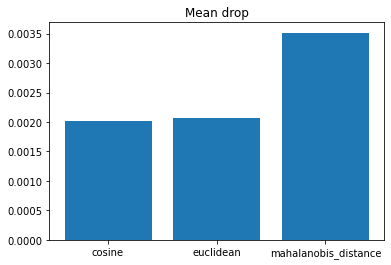

In [51]:
plot_results(mean_drops, "Mean drop")